In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import re
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer   # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences   # type: ignore
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout # type: ignore
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint   # type: ignore
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences  # type: ignore

c:\Users\vivek\anaconda3\envs\project\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Using a protion of Dataset to avoid conflicts while training because of low RAM(can use whole Dataset if Supported)
df = pd.read_csv(r"DATASETS\final_combined_reviews_700k.csv")

In [3]:
df

,sentiment,title,text
0,1,Wings Over The Pacific,A very poor movie. There were no Germany squar...
1,1,Disappointed...really disappointed.,I am really disappointed by this Oxo turner. I...
2,1,"Yes, great descriptions but a bit labored, no?","I'm not sorrry I plowed through this book, but..."
3,2,Excellent!,Excellent book. The characterization was super...
4,2,Retro Cap,Perfect Retro cap... I directed a play wherein...
...,...,...,...
699995,1,Not recommended,There are two things I have against Mr. Silver...
699996,1,when teachers become authors....,i used this book in my linear circuit analysis...
699997,1,Over the Top Bias,"According to Eastwood's friend, Richard Schick..."
699998,2,fast service,Received this faster than expected. Front cove...


In [3]:
from tabulate import tabulate
import numpy as np
import pandas as pd

# Print in a pretty table format
print(tabulate(df.head(10), headers='keys', tablefmt='fancy_grid'))


╒════╤═════════════╤════════════════════════════════════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│    │   sentiment │ title                                          │ text                                                                                                                                                                                                                                           

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  700000 non-null  int64 
 1   title      700000 non-null  object
 2   text       700000 non-null  object
dtypes: int64(1), object(2)
memory usage: 16.0+ MB


In [11]:
df.describe()

,sentiment
count,700000.000000
mean,1.501074
std,0.499999
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [4]:
# drop title column form dataset

df = df.drop('title', axis=1)
df


,sentiment,text
0,1,A very poor movie. There were no Germany squar...
1,1,I am really disappointed by this Oxo turner. I...
2,1,"I'm not sorrry I plowed through this book, but..."
3,2,Excellent book. The characterization was super...
4,2,Perfect Retro cap... I directed a play wherein...
...,...,...
699995,1,There are two things I have against Mr. Silver...
699996,1,i used this book in my linear circuit analysis...
699997,1,"According to Eastwood's friend, Richard Schick..."
699998,2,Received this faster than expected. Front cove...


In [5]:
# rename column  text as review

df = df.rename(columns={'text': 'review'})
df

,sentiment,review
0,1,A very poor movie. There were no Germany squar...
1,1,I am really disappointed by this Oxo turner. I...
2,1,"I'm not sorrry I plowed through this book, but..."
3,2,Excellent book. The characterization was super...
4,2,Perfect Retro cap... I directed a play wherein...
...,...,...
699995,1,There are two things I have against Mr. Silver...
699996,1,i used this book in my linear circuit analysis...
699997,1,"According to Eastwood's friend, Richard Schick..."
699998,2,Received this faster than expected. Front cove...


In [6]:
# Convert sentiment labels to 0/1
df['sentiment'] = df['sentiment'].replace({1: 0, 2: 1})

In [8]:
df

,sentiment,review
0,0,A very poor movie. There were no Germany squar...
1,0,I am really disappointed by this Oxo turner. I...
2,0,"I'm not sorrry I plowed through this book, but..."
3,1,Excellent book. The characterization was super...
4,1,Perfect Retro cap... I directed a play wherein...
...,...,...
699995,0,There are two things I have against Mr. Silver...
699996,0,i used this book in my linear circuit analysis...
699997,0,"According to Eastwood's friend, Richard Schick..."
699998,1,Received this faster than expected. Front cove...


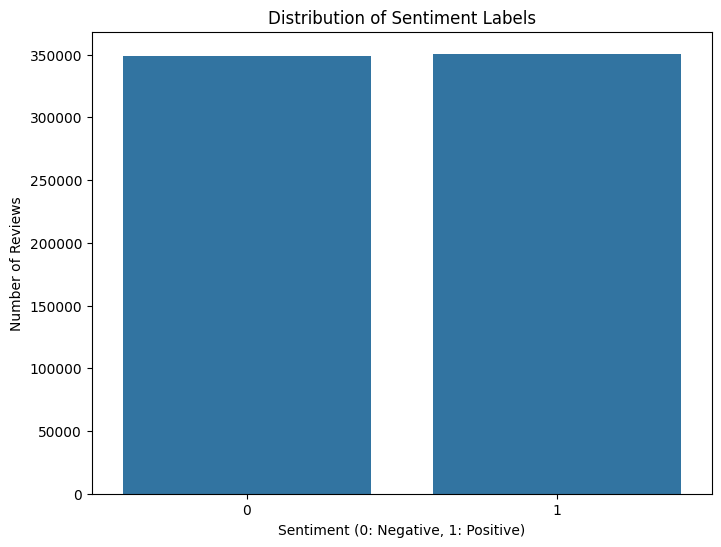

In [ ]:

#distribution of sentiment labels
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Number of Reviews')
plt.show()


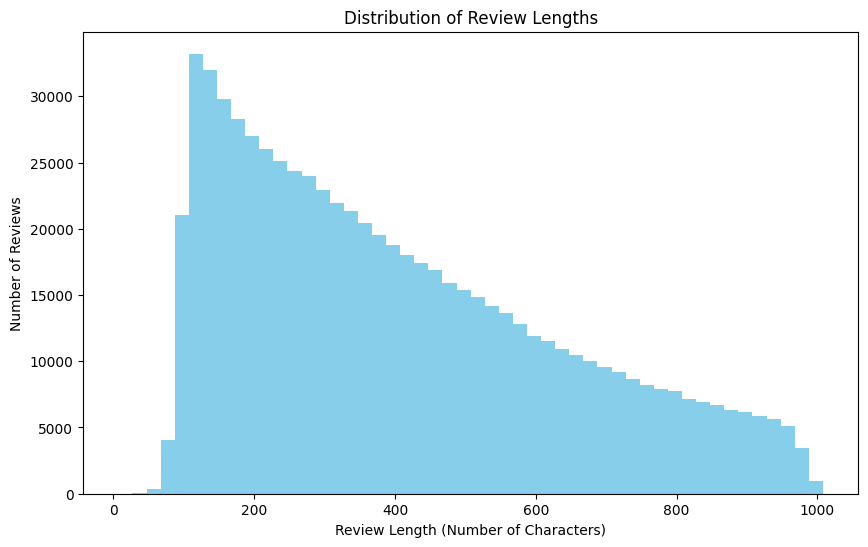

In [ ]:

#length distribution of reviews
review_lengths = df['review'].str.len()
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=50, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Number of Characters)')
plt.ylabel('Number of Reviews')
plt.show()



In [ ]:
# Clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower().strip()
    return text

df['review'] = df['review'].apply(clean_text)

In [ ]:
# --- Train-Test Split ---
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Hyperparameters
vocab_size = 10000  # Vocabulary size (limits the number of unique words)
max_length = 320    # Maximum review length (truncated/padded to adjust)
oov_token = "<OOV>"  # Out-of-vocabulary token for unseen words

In [ ]:

# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)  # Learn vocabulary from training data

# Convert text to sequences (numerical representation)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Padding sequences (ensuring uniform input length)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# Convert labels to NumPy arrays (ensures compatibility with TensorFlow models)
train_labels = np.array(y_train, dtype=int)
test_labels = np.array(y_test, dtype=int)

print("Tokenization and padding complete!")
print(f"Train shape: {train_padded.shape}, Test shape: {test_padded.shape}")

Tokenization and padding complete!
Train shape: (560000, 320), Test shape: (140000, 320)


In [ ]:
import pickle

# tokenizer save path. saving tokenizer to avoid rerun tokenization part(To save time)
tokenizer_path = "/content/drive/MyDrive/Colab Notebooks/tokenizer.pkl"

# Save the tokenizer
with open(tokenizer_path, 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Load the tokenizer (for verification or future use)
with open(tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)

print("Tokenizer saved and loaded successfully!")

Tokenizer saved and loaded successfully!


In [10]:
import pickle
# Load the tokenizer
tokenizer_path = "tokenizer.pkl"
with open(tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)


In [ ]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization # type: ignore

model = Sequential([
    # Improved embedding layer
    Embedding(input_dim=vocab_size, output_dim=256, input_shape=(max_length,)),

    # First Bidirectional LSTM layer with more units
    Bidirectional(LSTM(128, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.4),

    # Second Bidirectional LSTM layer
    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.4),

    # Third LSTM layer to capture deeper dependencies
    Bidirectional(LSTM(32)),
    BatchNormalization(),
    Dropout(0.3),

    # Dense layer for better feature extraction
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    # Final output layer for binary classification
    Dense(1, activation='sigmoid')
])

# Compiling with AdamW optimizer for better generalization ^-^
from tensorflow.keras.optimizers import AdamW   # type: ignore
model.compile(
    loss='binary_crossentropy',
    optimizer=AdamW(learning_rate=0.001, weight_decay=1e-4),
    metrics=['accuracy']
)

model.build(input_shape=(None, max_length))
model.summary()

c:\Users\vivek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 320, 256)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 320, 256)       │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 320, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 320, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 320, 128)       │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 320, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 320, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,178,241 (12.12 MB)

 Trainable params: 3,177,345 (12.12 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint   # type: ignore

# Defining callbacks to stop training model when val loss is not changing..
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Saving best model so that nxt time we don't have to retrain model again...
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/best_model.keras',monitor='val_loss',save_best_only=True)


# Training the model
history = model.fit(
    train_padded,
    train_labels,
    epochs=10,  # Adjust as needed
    batch_size=64,  # Can be tuned
    validation_split=0.1,  # Using 10% for validation
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 691s 87ms/step - accuracy: 0.7217 - loss: 0.4753 - val_accuracy: 0.8903 - val_loss: 0.2611
Epoch 2/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 657s 83ms/step - accuracy: 0.9181 - loss: 0.2164 - val_accuracy: 0.9172 - val_loss: 0.2082
Epoch 3/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 659s 84ms/step - accuracy: 0.9317 - loss: 0.1872 - val_accuracy: 0.9202 - val_loss: 0.2025
Epoch 4/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 683s 84ms/step - accuracy: 0.9403 - loss: 0.1645 - val_accuracy: 0.9203 - val_loss: 0.2043
Epoch 5/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 680s 84ms/step - accuracy: 0.9475 - loss: 0.1478 - val_accuracy: 0.9201 - val_loss: 0.2093
Epoch 6/10
7875/7875 ━━━━━━━━━━━━━━━━━━━━ 641s 81ms/step - accuracy: 0.9543 - loss: 0.1314 - val_accuracy: 0.9204 - val_loss: 0.2151


In [ ]:
# code for importing saved model

from tensorflow.keras.models import load_model # type: ignore

# Load the saved model
model_path = "best_model.keras"
model = load_model(model_path)

c:\Users\vivek\anaconda3\envs\project\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 64 variables whereas the saved optimizer has 68 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


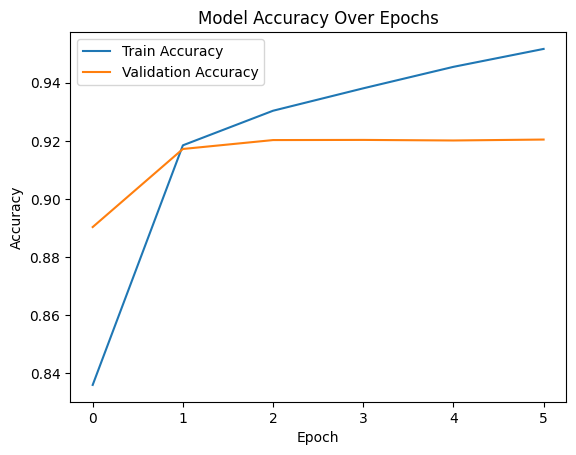

In [ ]:
# training & validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
#checking test accuracy

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_padded, test_labels)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4375/4375 ━━━━━━━━━━━━━━━━━━━━ 139s 31ms/step - accuracy: 0.9207 - loss: 0.2018
Test Loss: 0.2006
Test Accuracy: 0.9211


In [ ]:
# Hyperparameters
vocab_size = 10000  # Vocabulary size (limits the number of unique words)
max_length = 320    # Maximum review length (truncated/padded)
oov_token = "<OOV>"  # Out-of-vocabulary token for unseen words


# Clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower().strip()
    return text

df['review'] = df['review'].apply(clean_text)


def predict_sentiment(text):
    # Cleaning the input text
    cleaned = clean_text(text)

    # Converting the cleaned text to a sequence of tokens
    seq = tokenizer.texts_to_sequences([cleaned])

    # Pad the sequence to the fixed max_length
    padded = pad_sequences(seq, maxlen=max_length, padding='post', truncating='post')

    # Using the trained model to predict the sentiment
    pred = model.predict(padded)[0][0]

    # Determine sentiment and confidence
    if pred > 0.6:
        sentiment = "Positive"
    else:
        sentiment = "Negative"
    confidence = pred if pred > 0.5 else 1 - pred

    print(f"Review: {text}\nPredicted Sentiment: {sentiment} (Confidence: {confidence:.2%})")

# Test the prediction function with sample reviews
predict_sentiment("The shoes fell apart within a week. Extremely poor quality. Do not buy!")
predict_sentiment("Total waste of money. The quality is terrible, and it stopped working after a few days.")
predict_sentiment("Total waste of money. The quality is terrible, and it stopped working after a few days.")
predict_sentiment("I saw reviews and got excited to buy this product it was just okay not that great")
predict_sentiment("It lags sometimes and also facing heating issues, it's charging way too slow. Overall not worthy the price. Better to go with vivo or nothing")
predict_sentiment("I previously used boat airdops 141 for 2 years the fitting was excellent and audio quality was great then I saw this oneplus airpods review on YouTube I got excited and bought one after the use of 15 min I got a pain in my ears this design not fitting very well I can't use it for long time and sound quality also normal. This product not satisfied my expectations.")



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Review: The shoes fell apart within a week. Extremely poor quality. Do not buy!
Predicted Sentiment: Negative (Confidence: 99.90%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Review: Total waste of money. The quality is terrible, and it stopped working after a few days.
Predicted Sentiment: Negative (Confidence: 99.92%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Review: Total waste of money. The quality is terrible, and it stopped working after a few days.
Predicted Sentiment: Negative (Confidence: 99.92%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Review: I saw reviews and got excited to buy this product it was just okay not that great
Predicted Sentiment: Negative (Confidence: 98.15%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Review: It lags sometimes and also facing heating issues, it's charging way too slow. Overall not worthy the price. Better to go with vivo or nothing
Predicted Sentiment: Negative (Confidence: 94.84%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Re